In [10]:
import pandas as pd

# 数据加载
train=pd.read_csv('./train.csv')
print(train.head())

   ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2


In [11]:
#转换为pandas的日期格式：
train['Datetime']=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
#添加索引列
train.index=train.Datetime
print(train.head())

                     ID            Datetime  Count
Datetime                                          
2012-08-25 00:00:00   0 2012-08-25 00:00:00      8
2012-08-25 01:00:00   1 2012-08-25 01:00:00      2
2012-08-25 02:00:00   2 2012-08-25 02:00:00      6
2012-08-25 03:00:00   3 2012-08-25 03:00:00      2
2012-08-25 04:00:00   4 2012-08-25 04:00:00      2


In [12]:
#删除多余的列
train.drop(['ID','Datetime'],axis=1,inplace=True)
print(train.head())

                     Count
Datetime                  
2012-08-25 00:00:00      8
2012-08-25 01:00:00      2
2012-08-25 02:00:00      6
2012-08-25 03:00:00      2
2012-08-25 04:00:00      2


In [14]:
#按照天来采样
daily_train=train.resample('D').sum()
print(daily_train.head())
daily_train['ds']=daily_train.index
daily_train['y']=daily_train.Count
daily_train.drop(['Count'],axis=1,inplace=True)
print(daily_train.head())

            Count
Datetime         
2012-08-25     76
2012-08-26     88
2012-08-27     62
2012-08-28     58
2012-08-29     60
                   ds   y
Datetime                 
2012-08-25 2012-08-25  76
2012-08-26 2012-08-26  88
2012-08-27 2012-08-27  62
2012-08-28 2012-08-28  58
2012-08-29 2012-08-29  60


In [15]:
from fbprophet import Prophet
#拟合Prophet模型
m=Prophet(yearly_seasonality=True,daily_seasonality=True ,seasonality_prior_scale=0.1)
m.fit(daily_train)
#预测未来7个月，213天，延长日期到未来天数
future=m.make_future_dataframe(periods=213)
forecast=m.predict(future)
print(forecast)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


            ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2012-08-25   -410.029546  -2317.530678    127.961745   -410.029546   
1   2012-08-26   -401.962915  -2482.892671    -99.553126   -401.962915   
2   2012-08-27   -393.896284   -781.582451   1589.051262   -393.896284   
3   2012-08-28   -385.829652   -730.278536   1706.241440   -385.829652   
4   2012-08-29   -377.763021   -820.395746   1647.634975   -377.763021   
..         ...           ...           ...           ...           ...   
970 2015-04-22  16527.016093  15340.563419  17789.809911  16114.911854   
971 2015-04-23  16554.574408  15118.072296  17566.977347  16138.702547   
972 2015-04-24  16582.132723  14860.409807  17435.598669  16162.532032   
973 2015-04-25  16609.691037  13722.683052  16275.142657  16185.090831   
974 2015-04-26  16637.249352  13585.239527  16091.920647  16208.091880   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     -410.029546     -692.834

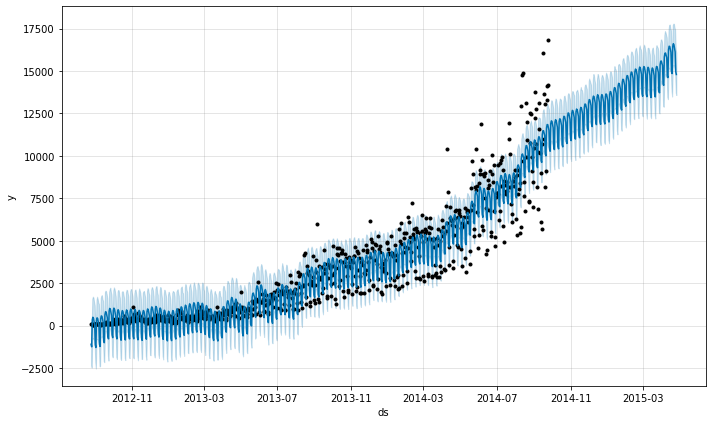

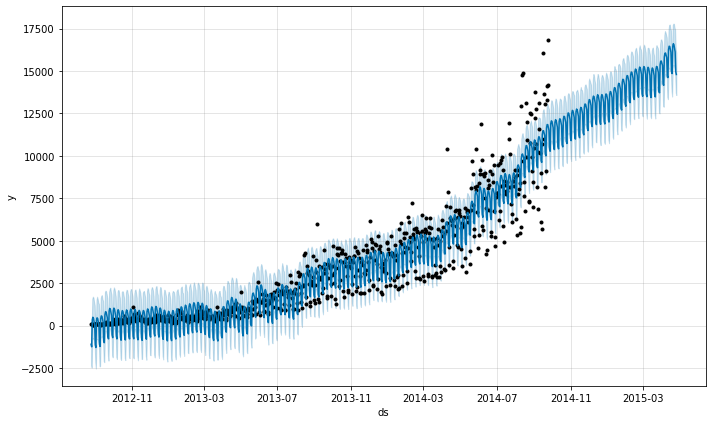

In [16]:
m.plot(forecast)

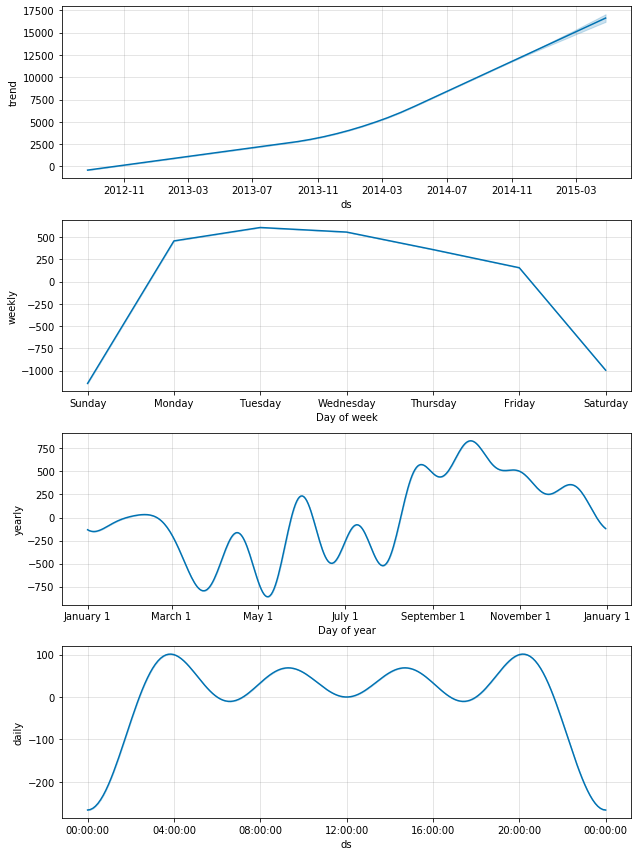

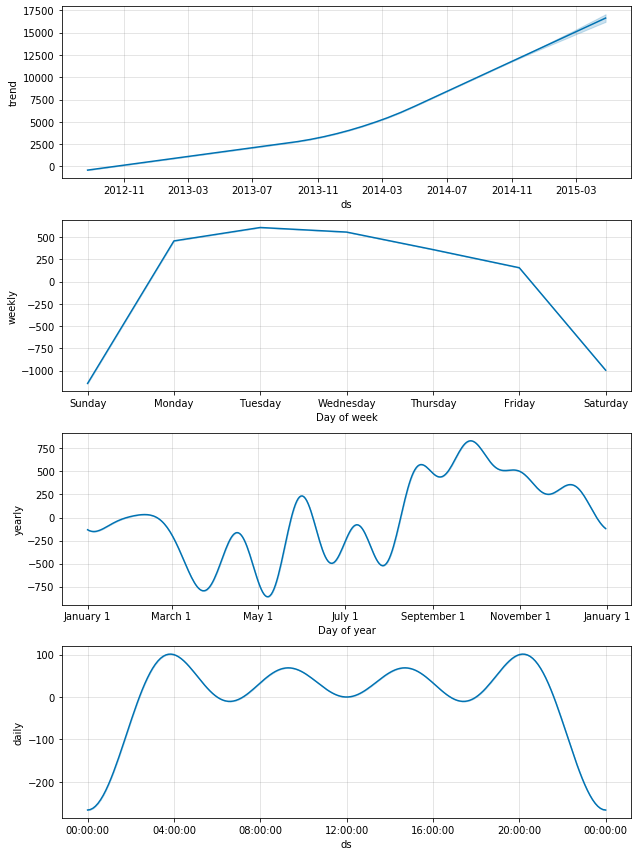

In [17]:
# 预测的成分分析绘图，展示预测中的趋势、周效应和年度效应
m.plot_components(forecast)